<a href="https://colab.research.google.com/github/dnguyend/MiscCollection/blob/main/colab/StiefelCurvature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sectional Curvature Range
We provide analysis of sectional curvature range for Stiefel manifolds

# 


In [ ]:
!git clone  https://github.com/pymanopt/pymanopt.git
import sys
sys.path.append("/content/pymanopt")

In [ ]:
!git clone https://github.com/dnguyend/ManNullRange.git
sys.path.append("/content/ManNullRange")


# Main routines for to compute sectional curvatures

In [ ]:
import numpy as np
from ManNullRange.manifolds.tools import vecah, unvecah, vech, unvech

In [ ]:

def CA(A1, B1, A2, B2, A3, B3, al):
    def t(A):
        return A.T
    return -al*A1@t(B3)@B2/2 + al*A2@t(B3)@B1/2 -\
        al*A3@t(B1)@B2/2 + al*A3@t(B2)@B1/2 + al*t(B1)@B2@A3/2 +\
        al*t(B1)@B3@A2/2 - al*t(B2)@B1@A3/2 - al*t(B2)@B3@A1/2 + A1@A2@A3/4 -\
        A1@t(B2)@B3/4 + A1@t(B3)@B2/4 - A2@A1@A3/4 + A2@t(B1)@B3/4 -\
        A2@t(B3)@B1/4 - A3@A1@A2/4 + A3@A2@A1/4 + A3@t(B1)@B2/2 -\
        A3@t(B2)@B1/2 - t(B1)@B2@A3/2 - t(B1)@B3@A2/4 + t(B2)@B1@A3/2 +\
        t(B2)@B3@A1/4 + t(B3)@B1@A2/4 - t(B3)@B2@A1/4


def CB(A1, B1, A2, B2, A3, B3, al):
    def t(A):
        return A.T
    return al*al*B1@A3@A2 - al*al*B2@A3@A1 + al*al*B3@A1@A2 -\
        al*al*B3@A2@A1 + al*B1@A2@A3/2 - al*B1@A3@A2/2 + al*B1@t(B2)@B3/2 -\
        al*B1@t(B3)@B2/2 - al*B2@A1@A3/2 + al*B2@A3@A1/2 - al*B2@t(B1)@B3/2 +\
        al*B2@t(B3)@B1/2 - al*B3@A1@A2 + al*B3@A2@A1 - al*B3@t(B1)@B2 +\
        al*B3@t(B2)@B1 - B1@t(B2)@B3 + B2@t(B1)@B3 + B3@t(B1)@B2 - B3@t(B2)@B1
def sec_cur_func(A1, B1, A2, B2, al):
    def t(M):
        return M.T
    new_form = np.array([
        1/(2*al)*np.trace(A1@A1@A2@A2),
        -al*np.trace(t(B1)@B1@A2@A2),
        (4*al-3)*np.trace(A1@t(B1)@B2@A2),
        (3-2*al)*np.trace(A1@t(B2)@B1@A2),
        -1/(2*al)*np.trace(A1@A2@A1@A2),
        (1-3*al/2)*np.trace(B1@t(B1)@B2@t(B2)),
        (3*al/2-2)*np.trace(B1@t(B2)@B1@t(B2)),
        np.trace(B2@t(B1)@B1@t(B2)),
        -al*np.trace(B2@A1@A1@t(B2))])
    return new_form.sum()

def grad_sec_cur(_A1, B1, _A2, B2, al):
    sqa = np.sqrt(al)
    A1 = _A1/sqa
    A2 = _A2/sqa
    
    def t(mat):
        return mat.T
    
    def gA1():
        return al*al*A1@t(B2)@B2 + al*al*A2@t(B1)@B2 -\
            2*al*al*A2@t(B2)@B1 - 2*al*al*t(B1)@B2@A2 +\
            al*al*t(B2)@B1@A2 + al*al*t(B2)@B2@A1 - al*A1@A2@A2/2 +\
            al*A2@A1@A2 - 3*al*A2@t(B1)@B2/2 + 3*al*A2@t(B2)@B1/2 -\
            al*A2@A2@A1/2 + 3*al*t(B1)@B2@A2/2 - 3*al*t(B2)@B1@A2/2

    def gA2():
        return -2*al*al*A1@t(B1)@B2 + al*al*A1@t(B2)@B1 +\
            al*al*A2@t(B1)@B1 + al*al*t(B1)@B1@A2 + al*al*t(B1)@B2@A1 -\
            2*al*al*t(B2)@B1@A1 + al*A1@A2@A1 + 3*al*A1@t(B1)@B2/2 -\
            3*al*A1@t(B2)@B1/2 - al*A1@A1@A2/2 - al*A2@A1@A1/2 -\
            3*al*t(B1)@B2@A1/2 + 3*al*t(B2)@B1@A1/2

    def gB1():
        return -2*al*al*B1@A2@A2 - 2*al*al*B2@A1@A2 + 4*al*al*B2@A2@A1 +\
            3*al*B2@A1@A2 - 3*al*B2@A2@A1 + 3*al*B2@t(B1)@B2 -\
            3*al*B2@t(B2)@B1 + 2*B1@t(B2)@B2 - 4*B2@t(B1)@B2 + 2*B2@t(B2)@B1

    def gB2():
        return 4*al*al*B1@A1@A2 - 2*al*al*B1@A2@A1 - 2*al*al*B2@A1@A1 -\
            3*al*B1@A1@A2 + 3*al*B1@A2@A1 - 3*al*B1@t(B1)@B2 +\
            3*al*B1@t(B2)@B1 + 2*B1@t(B1)@B2 - 4*B1@t(B2)@B1 + 2*B2@t(B1)@B1
    
    return gA1()/sqa, gB1(), gA2()/sqa, gB2()

def q_denom(A1, B1, A2, B2, al):
    return al_innner(A1, B1, A1, B1, al)*al_innner(A2, B2, A2, B2, al) -\
        al_innner(A1, B1, A2, B2, al)**2


def sec_cur_fml(A1, B1, A2, B2, al):
    # no scaling here
    return al*np.trace(CA(A1, B1, A2, B2, A1, B1, al) @ A2.T) +\
        np.trace(CB(A1, B1, A2, B2, A1, B1, al) @ B2.T)

    
def al_innner(A1, B1, A2, B2, al):
    return al*np.trace(A1@A2.T) + np.trace(B1@B2.T)

    
def sec_cur(A1, B1, A2, B2, al):
    def bk(U, V):
        return U@V - V@U
    vl1a = - B1.T@B2 + B2.T@B1
    vl1 = bk(A1, A2) + (3-4*al)*vl1a
    tot = al/4*np.trace(vl1@vl1.T)
    tot += 1/2*(1-2*al)*(1-2*al)*(1-2*al)*np.trace(vl1a@vl1a.T)
    # tot += (1/2-3*al/4)*np.trace(vl1a@vl1a.T)
    # tot += 2*(3*al/4-al*al)*np.trace(vl1@vl1a.T)
    
    vl2 = B1@A2-B2@A1
    tot += (al*al)*np.trace(vl2@vl2.T)
    vl3 = B2@B1.T-B1@B2.T
    tot += .5*np.trace(vl3@vl3.T)

    return tot





# Routine to optimize over the Grassmann of two plane sections at a point

In [ ]:

def curvature_range(n, p, al):
    from pymanopt.manifolds import Grassmann
    from pymanopt import Problem
    from pymanopt.solvers import TrustRegions
    from pymanopt.function import Callable

    sA = p*(p-1) // 2
    sB = p*(n-p)
    
    gr = Grassmann(sA+sB, 2)

    dlt = 1e-8
    
    def make_st_pairs(v):
        return unvecah(v[:sA, 0]), v[sA:, 0].reshape(n-p, p),\
            unvecah(v[:sA, 1]), v[sA:, 1].reshape(n-p, p)

    def pack_st_pairs(A1, B1, A2, B2):
        v = np.zeros((sA+sB, 2))
        v[:sA, 0] = vecah(A1)
        v[sA:, 0] = B1.reshape(-1)
        v[:sA, 1] = vecah(A2)
        v[sA:, 1] = B2.reshape(-1)
        return v

    @Callable
    def f(X):
        A1, B1, A2, B2 = make_st_pairs(X)
        return sec_cur_func(A1, B1, A2, B2, al)

    def f_reduced(X):
        A1, B1, A2, B2 = make_st_pairs(X)
        return sec_cur_reduced(A1, B1, A2, B2, al)
    # X = gr.rand()
    # print(f(X) - f_reduced(X))
    
    @Callable
    def df(X):
        A1, B1, A2, B2 = make_st_pairs(X)
        gA1, gB1, gA2, gB2 = grad_sec_cur(A1, B1, A2, B2, al)
        return pack_st_pairs(gA1, gB1, gA2, gB2)

    @Callable
    def hessf(xi, X):
        return (df(X+dlt*xi) - df(X))/dlt

    @Callable
    def mf(X):
        return -f(X)

    @Callable
    def mdf(X):
        return -df(X)

    @Callable
    def mhessf(xi, X):
        return -hessf(xi, X)

    if False:
        B = gr.rand()
        xi = gr.randvec(B)
        dlt = 1e-8
        # xcp = np.zeros_like(xi)
        # xcp[:sA, 0] = xi[:sA, 0]
        # print((f(B+dlt*xcp) - f(B))/dlt)
        # print(np.trace(df(B)@xcp.T))
        print((f(B+dlt*xi) - f(B))/dlt)
        print(np.trace(df(B)@xi.T))

        print(cz((df(B+dlt*xi) - df(B))/dlt - hessf(xi, B)))
    x0 = gr.rand()
    prob = Problem(
        gr, f, egrad=df, ehess=hessf, verbosity=1)
    
    solver = TrustRegions(maxtime=100000, maxiter=1000)
    opt = solver.solve(prob, x=x0, Delta_bar=250)
    # print(opt)
    # print('min curvature %f' % f(opt))

    mprob = Problem(
        gr, mf, egrad=mdf, ehess=mhessf, verbosity=1)

    mopt = solver.solve(mprob, x=x0, Delta_bar=250)
    # print(mopt)
    # print('max curvature %f' % f(mopt))

    # reconfirm:
    def recalc_val(opt):
        A1_, B1, A2_, B2 = make_st_pairs(opt)
        sqa = np.sqrt(al)
        A1 = A1_/sqa
        A2 = A2_/sqa
        return sec_cur_fml(A1, B1, A2, B2, al)/q_denom(A1, B1, A2, B2, al)
    if False:
        print('rcl min %f' % recalc_val(opt))
        print('rcl min %f' % recalc_val(mopt))
        return opt, mopt
    else:
        return recalc_val(opt), recalc_val(mopt)
        



# For each $\alpha$, this function compute the curvature at a number of sections, plus calling the curvature range routine to optimize numerically for the curvature range

In [ ]:
def calc_cur_boundary(n, p, al):
    from scipy.optimize import minimize
    
    def ab_inner(A1, B1, A2, B2):
        return al*np.trace(A1@A2.T) + np.trace(B1@B2.T)
    
    def f(X):
        A1 = unvecah(X[:dA])
        B1 = X[dA:dA+dB].reshape(n-p, p)
        A2 = unvecah(X[dA+dB:2*dA+dB])
        B2 = X[2*dA+dB:].reshape(n-p, p)
        denom = ab_inner(A1, B1, A1, B1)*ab_inner(A2, B2, A2, B2)
        if False:
            print(A1)
            print(B1)        
            print(A2)
            print(B2)        

            print(denom, ab_inner(A1, B1, A1, B1), ab_inner(A2, B2, A2, B2),
                  ab_inner(A1, B1, A2, B2), sec_cur(A1, B1, A2, B2, al))
        denom -= ab_inner(A1, B1, A2, B2)*ab_inner(A1, B1, A2, B2)
        return sec_cur(A1, B1, A2, B2, al)/denom

    def mf(X):
        return -f(X)
    dA = p*(p-1)//2
    dB = (n-p)*p
    
    def do_K0():
        X2 = np.zeros(2*(dA+dB))
        if p >= 3:
            X2[0] = np.sqrt(2)
            X2[dA+dB] = np.sqrt(2)
            X2[dA+2] = 2
            X2[2+dA+dB+dA] = -al
        else:
            # need p < n-1
            X2[dA] = 1
            X2[dA + dB+dA+p+1] = 1
        return f(X2)

    def do_K1():
        # need p < n-1
        X2 = np.zeros(2*(dA+dB))
        X2[dA] = 1
        X2[dA + dB+dA+p] = 1
        return f(X2)

    def do_K_1_8a():
        X2 = np.zeros(2*(dA+dB))
        X2[0] = 1
        X2[dA + dB+p-1] = 1
        return f(X2)

    def do_K_al_2():
        X2 = np.zeros(2*(dA+dB))
        X2[0] = 1
        X2[dA + dB+dA] = 1
        return f(X2)

    def do_K_1_3a_2():
        X2 = np.zeros(2*(dA+dB))
        X2[dA] = 1
        X2[dA + dB+dA+1] = 1
        return f(X2)
        
    def do_K_2_3a_2():
        # need p < n-1
        X2 = np.zeros(2*(dA+dB))        
        X2[dA] = 1
        X2[dA+p+1] = 1
        
        X2[dA+dB+dA+1] = 1
        X2[dA+dB+dA+p] = -1
        return f(X2)

    def do_K_1_1_2a():
        X2 = np.zeros(2*(dA+dB))
        X2[0] = np.sqrt(2)
        X2[dA + p - 1] = -1
        X2[dA+dB+p-2] = np.sqrt(2)
        X2[dA+dB+dA+1] = 1
        return f(X2)

    def do_K_1_4a():
        X2 = np.zeros(2*(dA+dB))
        X2[0] = np.sqrt(2)
        X2[dA-1] = np.sqrt(2)
        X2[dA + dB+p-3] = np.sqrt(2)
        X2[dA + dB+2*p-4] = -np.sqrt(2)
        return f(X2)

    def bcfunc(al):
        return -(8*al*al - 6*al - 1)/(7-10*al)

    def bccur(x, al):
        return (0.5*al + al*(4*al-3)*x + (2-3*al)/2*x*x)/(2*al+x)/(2*al+x)

    def do_a_12_23():
        # special function for the range
        # between 1/2 and 2/3
        
        if al > .7:
            bc = np.sqrt(13)/3
        else:
            bc = np.sqrt(bcfunc(al))
                
        X2 = np.zeros(2*(dA+dB))
        X2[0] = np.sqrt(2)
        X2[dA] = bc
        X2[dA + dB+p-1] = np.sqrt(2)
        X2[dA + dB+dA+2] = bc
        return f(X2)        

    out = np.full(22, np.nan)
    try:
        out[0] = do_K0()
        out[1] = 0        
    except Exception:
        print('0 failed')
    
    try:
        out[2] = do_K1()
        out[3] = 1        
    except Exception:
        print('1 failed')
              
    try:
        if p >= 3:            
            out[4] = do_K_1_8a()
            out[5] = 1/8/al        
    except Exception:
        print('1_8a failed')
    
    try:
        out[6] = do_K_al_2()
        out[7] = al/2        
    except Exception:
        print('al_2 failed')
              
    try:
        out[8] = do_K_1_3a_2()
        out[9] = 1-1.5*al        
    except Exception:
        print('1_3a_2 failed')
    
    try:
        out[10] = do_K_2_3a_2()
        out[11] = 2-1.5*al        
    except Exception:
        print('2_3a_2 failed')

    try:
        if p >= 3:
            out[12] = do_K_1_1_2a()
            out[13] = 1/(1+2*al)
    except Exception:
        print('1_1_2a failed')

    try:
        if p >= 4:
            out[14] = do_K_1_4a()
            out[15] = 1/(4*al)
    except Exception:
        print('1_4a failed')

    try:
        if p >= 3:
            out[16] = do_a_12_23()
            out[17] = bccur(bcfunc(al), al)
    except Exception:
        print('1_4a failed')        
                
    out[-4] = np.nanmin(out[np.arange(9)*2])
    out[-3] = np.nanmax(out[np.arange(9)*2])

    if False:
        X0 = np.random.randn(2*(dA+dB))
        opt = minimize(f, X0)
        print(opt['fun'])
        out[-2] = opt['fun']
        # print(opt['x'])
        mopt = minimize(mf, X0)
        print(mopt['fun'])
        out[-1] = -mopt['fun']
    minv, maxv = curvature_range(n, p, al)
    out[-2] = minv
    out[-1] = maxv

    if False:
        x1 = np.zeros((n, n))
        x2 = np.zeros((n, n))

        x1[:n-1, :n-1] = unvecah(mopt['x'][:dA])
        x1[-1, :-1] = mopt['x'][dA:dA+dB]
        x1[:-1, -1] = -mopt['x'][dA:dA+dB]

        x2[:n-1, :n-1] = unvecah(mopt['x'][dA+dB:dA+dB+dA])
        x2[-1, :-1] = mopt['x'][dA+dB+dA:]
        x2[:-1, -1] = -mopt['x'][dA+dB+dA:]
    
    return out


# loop over a ladder of $\alpha$'s, which around 3 times the scenarios and # 17 pairs of $(n, p)$ in runlist. Save the result to the csv file 'w1.csv'

In [ ]:

def loop_cur():
    al_range_0 = sorted([2/3 - np.sqrt(13)/6, 2/3 + np.sqrt(13)/6, 2/3, 4/3, 2,
                         1/2, 1, 1/6, (np.sqrt(17)-1)/4, (np.sqrt(73)+5)/12])

    div = 3
    scenarios = ['0', '1', '1/(8al)', 'al/2', '1-3al/2', '2-3al/2',
                 '1/(1+2al)', '1/(4al)', 'a_12_23']
    
    def add_points(al_range_0, div):
        new_range = list(np.arange(1, div)*al_range_0[0]/div)
        for i in range(1, len(al_range_0)):
            new_range.extend(
                list(al_range_0[i-1] +
                     (al_range_0[i]-al_range_0[i-1])/div*np.arange(div)))
        new_range.append(al_range_0[-1])
        return new_range        

    al_range = add_points(al_range_0, div)
    maxN = 6
    ret = {}
    runlist = []
    for n in range(3, maxN):
        for p in range(2, n):
            runlist.append([n, p])

    runlist = [[3, 2], [4, 2], [4, 3], [5, 2], [5, 3], [5, 4],
               [6, 2], [6, 3], [6, 4], [6, 5],
               [10, 2], [10, 3], [10, 5],
               [10, 8], [10, 9],
               [100, 10], [100, 20]]
    # Don do 1000 seems too hard [1000, 10], [1000, 20], [1000, 40]]
    for n, p in runlist:
        ret[n, p] = {}
        for ii in range(len(al_range)):
            ret[n, p][ii] = calc_cur_boundary(n, p, al_range[ii])

    def is_close(a, b):
        return np.abs(a-b) < 1e-6

    def check_one_line(ar):
        unmatch = []
        kmax = None
        kmin = None
        min_match =  is_close(ar[-4], ar[-2])
        max_match =  is_close(ar[-3], ar[-1])
            
        for ii in range(len(scenarios)):
            if ~np.isnan(ar[2*ii]):
                if not is_close(ar[2*ii], ar[2*ii+1]):
                    unmatch.append(ii)
                if is_close(ar[2*ii], ar[-4]):
                    kmin = ii
                
                if is_close(ar[2*ii], ar[-3]):
                    kmax = ii
        return unmatch, min_match, max_match, kmin, kmax
    
    for n, p in ret:
        if p < n-2 and n > 4:
            continue
        for ii in ret[n, p]:
            unmatch, min_match, max_match, kmin, kmax = check_one_line(
                ret[n, p][ii])
            if len(unmatch) != 0:
                print(n, p, al_range[ii])
                print(
                    'unmatch', ret[n, p][ii],
                    unmatch, min_match, max_match,
                    kmin, kmax)
            else:
                if min_match and max_match:
                    continue
                if not min_match and ret[n, p][ii][-4] < ret[n, p][ii][-2]:
                    continue
                if not max_match and ret[n, p][ii][-3] > ret[n, p][ii][-1]:
                    continue
                
                print(n, p, al_range[ii])                
                print(
                    'match', ret[n, p][ii],
                    unmatch, min_match, max_match,
                    kmin, kmax)
                
    header = ['n', 'p', 'alx', 'alpha', 'minc', 'maxc', 'mins', 'maxs',
              'minf', 'maxf']
    import csv    
    ff = open('w1.csv', 'w')
    fw = csv.writer(ff)
    fw.writerow(header)
    for n, p in sorted(ret):
        if p > n-2 and n > 4:
            pass
            # continue
        for ii in ret[n, p]:
            unmatch, min_match, max_match, kmin, kmax = check_one_line(
                ret[n, p][ii])
            oo = ['%d' % n, '%d' % p, '%d' % ii, '%.3f' % al_range[ii]]
            oo.extend(['%.3f' % a for a in ret[n, p][ii][-4:]])

            def gnn(kk):
                if kk is None:
                    return ''
                else:
                    return scenarios[kk]
            oo.extend([gnn(kmin), gnn(kmax)])
            fw.writerow(oo)
    ff.close()


In [ ]:
# import pdb
loop_cur()

0 failed
1 failed
2_3a_2 failed
Optimizing...
Terminated - min grad norm reached after 27 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 4 iterations, 0.02 seconds.

0 failed
1 failed
2_3a_2 failed
Optimizing...
Terminated - min grad norm reached after 23 iterations, 0.05 seconds.

Optimizing...
Terminated - min grad norm reached after 5 iterations, 0.03 seconds.

0 failed
1 failed
2_3a_2 failed
Optimizing...
Terminated - min grad norm reached after 23 iterations, 0.07 seconds.

Optimizing...
Terminated - min grad norm reached after 5 iterations, 0.03 seconds.

0 failed
1 failed
2_3a_2 failed
Optimizing...
Terminated - min grad norm reached after 24 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 6 iterations, 0.03 seconds.

0 failed
1 failed
2_3a_2 failed
Optimizing...
Terminated - min grad norm reached after 18 iterations, 0.06 seconds.

Optimizing...
Terminated - min grad norm reached after 6 iterations, 0.03 secon

# There are four cases
  1. ($4, 3)$
  2. $(n, 3)$ for $n \geq 5$
  3. $(n, 3)$, for $n-2\geq p \geq 4$
  4. $(n, n-1)$, $n\geq 5$
We graph the representative sections, and the max and min range. The representative sections always appear as the ends of the range (or better, since the optimization may only find local maximum or minimum).


In [ ]:
# graph 
import pandas as pd
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

b = (4 - np.sqrt(13))/6/3
e = 2.1
N = 1000

def c(x, a):
  return ((2-3*a)/2*x*x +a*(4*a-3)*x + a/2)/(x+2*a)**2

def gmin(x):
  return (1+6*x -8*x*x)/(7-10*x)

def ll(a):
  return c(gmin(a), a)

a_s = fsolve(gmin, 1)
print(a_s)

ar = b + (e-b)/N*np.arange(N+1)
lly = ll(ar)
lly[(ar > .7) & (ar < a_s)] = np.nan
y0 = np.zeros_like(ar)
y1 = np.ones_like(ar)
y18a =1/8/ar
y1_2a = 1/(1+2*ar)
y_23a2 = (2-3*ar)/2
y_43a2 = (4-3*ar)/2
y2a = ar/2
y14a =1/4/ar
ptable = pd.read_csv('w1.csv')


[0.8903882]


In [ ]:
from IPython.display import display, HTML
ptable = pd.read_csv('w1.csv')
# display(ptable)
# display(HTML(ptable.loc[(ptable.n > 4) & (ptable.p == 3) & (ptable.alpha <=.06)].to_html()))
ptable.loc[(ptable.n == 5) & (ptable.p == 2)]


,n,p,alx,alpha,minc,maxc,mins,maxs,minf,maxf
90,5,2,0,0.022,0.000,1.967,0.000,1.967,0,2-3al/2
91,5,2,1,0.044,0.000,1.934,0.000,1.934,0,2-3al/2
92,5,2,2,0.066,0.000,1.901,0.000,1.901,0,2-3al/2
93,5,2,3,0.099,0.000,1.851,0.000,1.851,0,2-3al/2
94,5,2,4,0.133,0.000,1.800,0.000,1.800,0,2-3al/2
95,5,2,5,0.167,0.000,1.750,0.000,1.750,0,2-3al/2
96,5,2,6,0.278,0.000,1.583,0.000,1.583,0,2-3al/2
97,5,2,7,0.389,0.000,1.417,0.000,1.417,0,2-3al/2
98,5,2,8,0.500,0.000,1.250,0.000,1.250,0,2-3al/2
99,5,2,9,0.556,0.000,1.167,0.000,1.167,0,2-3al/2


0.28347580386979804
0.7995871097683787
0.2857142857142858


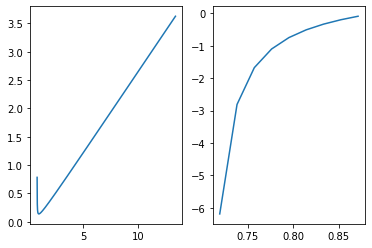

In [ ]:
bb = .77
ar1 = bb+(5-bb)*np.arange(3*N)/N
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(ar1, ll(ar1))
xx = 100
print(ll(xx)/xx)
print(gmin(xx)/xx)
print((4*.8-1.5*.8*.8  ) /2.8/2.8)
ar2 = .7 + (a_s -.7)*np.arange(10)/10
ax2.plot(ar2, gmin(ar2))

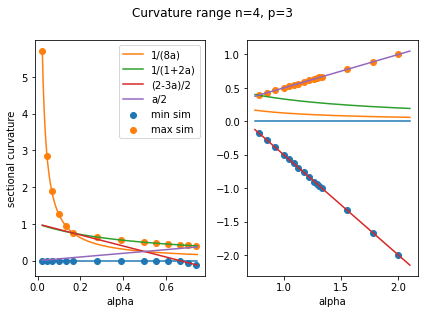

In [ ]:
# CASE (4, 3)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Curvature range n=4, p=3', y=1.08)

qf = N*7 // 20
tbl = ptable.loc[(ptable.n == 4) & (ptable.p == 3), ['alpha', 'mins', 'maxs']]
tbla = tbl.loc[tbl.alpha <= ar[:qf][-1]]
tblb = tbl.loc[tbl.alpha >= ar[qf]]
# ax1.plot(ar[:qf], lly[:qf], label='ll')
ax1.plot(ar[:qf], y0[:qf])
ax1.plot(ar[:qf], y18a[:qf], label='1/(8a)')
ax1.plot(ar[:qf], y1_2a[:qf], label='1/(1+2a)')
ax1.plot(ar[:qf], y_23a2[:qf], label='(2-3a)/2')
ax1.plot(ar[:qf], y2a[:qf], label='a/2')
ax1.scatter(tbla.alpha, tbla.mins, label='min sim')
ax1.scatter(tbla.alpha, tbla.maxs, label='max sim')
ax1.legend()

ax2.plot(ar[qf:], y0[qf:])
ax2.plot(ar[qf:], y18a[qf:], label='1/(8a)')
ax2.plot(ar[qf:], y1_2a[qf:], label='1/(1+2a)')
ax2.plot(ar[qf:], y_23a2[qf:], label='(2-3a)/2')
ax2.plot(ar[qf:], y2a[qf:], label='a/2')
ax2.scatter(tblb.alpha, tblb.mins, label='min sim')
ax2.scatter(tblb.alpha, tblb.maxs, label='max sim')

ax1.set_xlabel('alpha')
ax2.set_xlabel('alpha')
ax1.set_ylabel('sectional curvature')
plt.tight_layout()



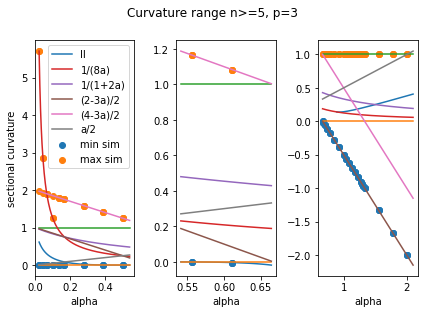

In [ ]:
# CASE (n, 3), n >=5
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Curvature range n>=5, p=3', y=1.08)

qf = N*5 // 20
qf1 = N*62//200
tbl = ptable.loc[(ptable.n > 4) & (ptable.p == 3), ['alpha', 'mins', 'maxs']]
tbla = tbl.loc[tbl.alpha <= ar[:qf][-1]]
tblb = tbl.loc[(tbl.alpha >= ar[qf]) & (tbl.alpha <= ar[qf1])]
tblc = tbl.loc[(tbl.alpha >= ar[qf1])]
if True:
  ax1.plot(ar[:qf], lly[:qf], label='ll')
  ax1.plot(ar[:qf], y0[:qf])
  ax1.plot(ar[:qf], y1[:qf])
  ax1.plot(ar[:qf], y18a[:qf], label='1/(8a)')
  ax1.plot(ar[:qf], y1_2a[:qf], label='1/(1+2a)')
  ax1.plot(ar[:qf], y_23a2[:qf], label='(2-3a)/2')
  ax1.plot(ar[:qf], y_43a2[:qf], label='(4-3a)/2')
  ax1.plot(ar[:qf], y2a[:qf], label='a/2')
ax1.scatter(tbla.alpha, tbla.mins, label='min sim')
ax1.scatter(tbla.alpha, tbla.maxs, label='max sim')
ax1.legend()

if True:
  ax2.plot(ar[qf:qf1], lly[qf:qf1], label='ll')
  ax2.plot(ar[qf:qf1], y0[qf:qf1])
  ax2.plot(ar[qf:qf1], y1[qf:qf1])
  ax2.plot(ar[qf:qf1], y18a[qf:qf1], label='1/(8a)')
  ax2.plot(ar[qf:qf1], y1_2a[qf:qf1], label='1/(1+2a)')
  ax2.plot(ar[qf:qf1], y_23a2[qf:qf1], label='(2-3a)/2')
  ax2.plot(ar[qf:qf1], y_43a2[qf:qf1], label='(4-3a)/2')
  ax2.plot(ar[qf:qf1], y2a[qf:qf1], label='a/2')

  ax2.scatter(tblb.alpha, tblb.mins, label='min sim')
  ax2.scatter(tblb.alpha, tblb.maxs, label='max sim')

  #ax2.legend()

ax3.plot(ar[qf1:], lly[qf1:], label='ll')
ax3.plot(ar[qf1:], y0[qf1:])
ax3.plot(ar[qf1:], y1[qf1:])
ax3.plot(ar[qf1:], y18a[qf1:], label='1/(8a)')
ax3.plot(ar[qf1:], y1_2a[qf1:], label='1/(1+2a)')
ax3.plot(ar[qf1:], y_23a2[qf1:], label='(2-3a)/2')
ax3.plot(ar[qf1:], y_43a2[qf1:], label='(4-3a)/2')
ax3.plot(ar[qf1:], y2a[qf1:], label='a/2')

ax3.scatter(tblc.alpha, tblc.mins, label='min sim')
ax3.scatter(tblc.alpha, tblc.maxs, label='max sim')

ax1.set_ylabel('sectional curvature')
ax1.set_xlabel('alpha')
ax2.set_xlabel('alpha')
ax3.set_xlabel('alpha')

plt.tight_layout()




# We see the optimizer can stop at a local minima, when $\alpha$ is small, so the optimized value is actually smaller than the actual representative in the list

In [ ]:
tbla

,alpha,mins,maxs
120,0.022,0.0,5.704
121,0.044,0.0,2.852
122,0.066,0.0,1.901
123,0.099,0.0,1.258
210,0.022,0.0,1.967
211,0.044,0.0,2.852
212,0.066,0.0,1.901
213,0.099,0.0,1.258
330,0.022,0.0,5.704
331,0.044,0.0,1.934


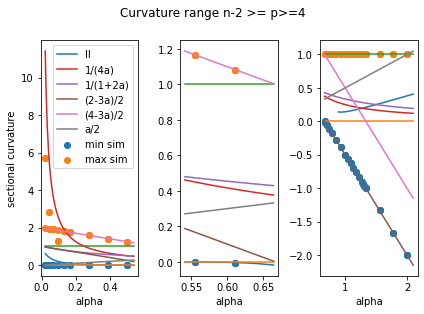

In [ ]:
# CASE (n, p), n -2>= p >= 4
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Curvature range n-2 >= p>=4', y=1.08)

qf = N*5 // 20
qf1 = N*62//200
tbl = ptable.loc[(ptable.n > 4) & (ptable.p == 3), ['alpha', 'mins', 'maxs']]
tbla = tbl.loc[tbl.alpha <= ar[:qf][-1]]
tblb = tbl.loc[(tbl.alpha >= ar[qf]) & (tbl.alpha <= ar[qf1])]
tblc = tbl.loc[(tbl.alpha >= ar[qf1])]
ax1.plot(ar[:qf], lly[:qf], label='ll')
ax1.plot(ar[:qf], y0[:qf])
ax1.plot(ar[:qf], y1[:qf])
ax1.plot(ar[:qf], y14a[:qf], label='1/(4a)')
ax1.plot(ar[:qf], y1_2a[:qf], label='1/(1+2a)')
ax1.plot(ar[:qf], y_23a2[:qf], label='(2-3a)/2')
ax1.plot(ar[:qf], y_43a2[:qf], label='(4-3a)/2')
ax1.plot(ar[:qf], y2a[:qf], label='a/2')
ax1.scatter(tbla.alpha, tbla.mins, label='min sim')
ax1.scatter(tbla.alpha, tbla.maxs, label='max sim')
ax1.legend()

if True:
  ax2.plot(ar[qf:qf1], lly[qf:qf1], label='ll')
  ax2.plot(ar[qf:qf1], y0[qf:qf1])
  ax2.plot(ar[qf:qf1], y1[qf:qf1])
  ax2.plot(ar[qf:qf1], y14a[qf:qf1], label='1/(4a)')
  ax2.plot(ar[qf:qf1], y1_2a[qf:qf1], label='1/(1+2a)')
  ax2.plot(ar[qf:qf1], y_23a2[qf:qf1], label='(2-3a)/2')
  ax2.plot(ar[qf:qf1], y_43a2[qf:qf1], label='(4-3a)/2')
  ax2.plot(ar[qf:qf1], y2a[qf:qf1], label='a/2')

  ax2.scatter(tblb.alpha, tblb.mins, label='min sim')
  ax2.scatter(tblb.alpha, tblb.maxs, label='max sim')

  #ax2.legend()

ax3.plot(ar[qf1:], lly[qf1:], label='ll')
ax3.plot(ar[qf1:], y0[qf1:])
ax3.plot(ar[qf1:], y1[qf1:])
ax3.plot(ar[qf1:], y14a[qf1:], label='1/(4a)')
ax3.plot(ar[qf1:], y1_2a[qf1:], label='1/(1+2a)')
ax3.plot(ar[qf1:], y_23a2[qf1:], label='(2-3a)/2')
ax3.plot(ar[qf1:], y_43a2[qf1:], label='(4-3a)/2')
ax3.plot(ar[qf1:], y2a[qf1:], label='a/2')

ax3.scatter(tblc.alpha, tblc.mins, label='min sim')
ax3.scatter(tblc.alpha, tblc.maxs, label='max sim')
ax1.set_ylabel('sectional curvature')
ax1.set_xlabel('alpha')
ax2.set_xlabel('alpha')
ax3.set_xlabel('alpha')

plt.tight_layout()
#ax3.legend()



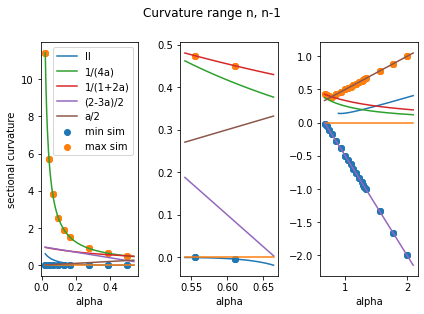

In [ ]:
# CASE (n, n-1), n >= 5
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Curvature range n, n-1', y=1.08)

qf = N*5 // 20
qf1 = N*62//200
tbl = ptable.loc[(ptable.n > 4) & (ptable.p +1 == ptable.n), ['alpha', 'mins', 'maxs']]
tbla = tbl.loc[tbl.alpha <= ar[:qf][-1]]
tblb = tbl.loc[(tbl.alpha >= ar[qf]) & (tbl.alpha <= ar[qf1])]
tblc = tbl.loc[(tbl.alpha >= ar[qf1])]
ax1.plot(ar[:qf], lly[:qf], label='ll')
ax1.plot(ar[:qf], y0[:qf])
# ax1.plot(ar[:qf], y1[:qf])
ax1.plot(ar[:qf], y14a[:qf], label='1/(4a)')
ax1.plot(ar[:qf], y1_2a[:qf], label='1/(1+2a)')
ax1.plot(ar[:qf], y_23a2[:qf], label='(2-3a)/2')
# ax1.plot(ar[:qf], y_43a2[:qf], label='(4-3a)/2')
ax1.plot(ar[:qf], y2a[:qf], label='a/2')
ax1.scatter(tbla.alpha, tbla.mins, label='min sim')
ax1.scatter(tbla.alpha, tbla.maxs, label='max sim')
ax1.legend()

if True:
  ax2.plot(ar[qf:qf1], lly[qf:qf1], label='ll')
  ax2.plot(ar[qf:qf1], y0[qf:qf1])
  # ax2.plot(ar[qf:qf1], y1[qf:qf1])
  ax2.plot(ar[qf:qf1], y14a[qf:qf1], label='1/(4a)')
  ax2.plot(ar[qf:qf1], y1_2a[qf:qf1], label='1/(1+2a)')
  ax2.plot(ar[qf:qf1], y_23a2[qf:qf1], label='(2-3a)/2')
  # ax2.plot(ar[qf:qf1], y_43a2[qf:qf1], label='(4-3a)/2')
  ax2.plot(ar[qf:qf1], y2a[qf:qf1], label='a/2')

  ax2.scatter(tblb.alpha, tblb.mins, label='min sim')
  ax2.scatter(tblb.alpha, tblb.maxs, label='max sim')

  #ax2.legend()

ax3.plot(ar[qf1:], lly[qf1:], label='ll')
ax3.plot(ar[qf1:], y0[qf1:])
# ax3.plot(ar[qf1:], y1[qf1:])
ax3.plot(ar[qf1:], y14a[qf1:], label='1/(4a)')
ax3.plot(ar[qf1:], y1_2a[qf1:], label='1/(1+2a)')
ax3.plot(ar[qf1:], y_23a2[qf1:], label='(2-3a)/2')
# ax3.plot(ar[qf1:], y_43a2[qf1:], label='(4-3a)/2')
ax3.plot(ar[qf1:], y2a[qf1:], label='a/2')

ax3.scatter(tblc.alpha, tblc.mins, label='min sim')
ax3.scatter(tblc.alpha, tblc.maxs, label='max sim')
ax1.set_ylabel('sectional curvature')
ax1.set_xlabel('alpha')
ax2.set_xlabel('alpha')
ax3.set_xlabel('alpha')

plt.tight_layout()
#ax3.legend()

